In [ ]:
%pip install scikit-learn scipy numpy matplotlib
import os
import numpy as np
import matplotlib.pyplot as plt

['training_data', 'training_labels', 'test_data']


<ipython-input-12-8fd8153c99e0>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'k', color = 'black', label = 'separating hyperplane')
<ipython-input-12-8fd8153c99e0>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'k', color = 'blue', label = 'negative margin')
<ipython-input-12-8fd8153c99e0>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'k', color = 'red', label = 'positive margin')


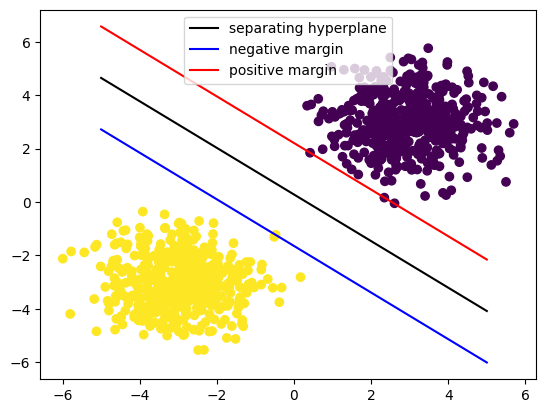

In [ ]:
# Plot the data points
def plot_data_points(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels)

# Plot the decision boundary
def plot_decision_boundary(w, b):
    x = np.linspace(-5, 5, 100)
    y = -(w[0] * x + b) / w[1]
    plt.plot(x, y, 'k', color = 'black', label = 'separating hyperplane')

def plot_margins(w, b):
    x = np.linspace(-5, 5, 100)
    # positive and negative margins
    y = -(w[0] * x + b - 1) / w[1]
    plt.plot(x, y, 'k', color = 'blue', label = 'negative margin')

    y = -(w[0] * x + b + 1) / w[1]
    plt.plot(x, y, 'k', color = 'red', label = 'positive margin')

    plt.legend()


toy = np.load('/content/data/toy-data.npz')
print(toy.files)
toy_training_data = toy['training_data']
toy_training_labels = toy['training_labels']

[w, b] = [-0.4528, -0.5190], 0.1471
plot_data_points(toy_training_data, toy_training_labels)
plot_decision_boundary(w, b)
plot_margins(w, b)

# support vectors will be manually circled in submission

In [61]:
# Question 3

# loading in datasets
mnist = np.load('/content/data/mnist-data.npz')
mnist_data = mnist['training_data']
mnist_labels = mnist['training_labels']
spam = np.load('/content/data/spam-data.npz')
spam_data = spam['training_data']
spam_labels = spam['training_labels']

In [62]:
# Part a), MNIST
np.random.seed(8)
# shuffle indices
mnist_indices = np.arange(mnist_data.shape[0])
np.random.shuffle(mnist_indices)

# new shuffled data and labels
mnist_shuffled_data = mnist_data[mnist_indices]
mnist_shuffled_labels = mnist_labels[mnist_indices]

# partition dataset into validation and training
mnist_validation_data = mnist_shuffled_data[:10000]
mnist_validation_labels = mnist_shuffled_labels[:10000]
mnist_training_data = mnist_shuffled_data[10000:]
mnist_training_labels = mnist_shuffled_labels[10000:]

# Part a), spam

# shuffle indices
spam_indices = np.arange(spam_data.shape[0])
np.random.shuffle(spam_indices)

# new shuffled data and labels
spam_shuffled_data = spam_data[spam_indices]
spam_shuffled_labels = spam_labels[spam_indices]

# partition dataset into validation and training
validation_size = int(0.2 * spam_data.shape[0])
spam_validation_data = spam_shuffled_data[:validation_size]
spam_validation_labels = spam_shuffled_labels[:validation_size]
spam_training_data = spam_shuffled_data[validation_size:]
spam_training_labels = spam_shuffled_labels[validation_size:]

In [ ]:
# Part b)
def evaluation(true_y, pred_y):
    indicator = [0 for _ in range(len(true_y))]
    for i in range(len(true_y)):
        indicator[i] = 1 if true_y[i] == pred_y[i] else 0
    return np.mean(indicator)

Testing training size: 100
Training accuracy: 1.0
Validation accuracy: 0.7524
Testing training size: 200
Training accuracy: 1.0
Validation accuracy: 0.8113
Testing training size: 500
Training accuracy: 1.0
Validation accuracy: 0.8597
Testing training size: 1000
Training accuracy: 1.0
Validation accuracy: 0.8764
Testing training size: 2000
Training accuracy: 1.0
Validation accuracy: 0.8912
Testing training size: 5000
Training accuracy: 1.0
Validation accuracy: 0.9061
Testing training size: 10000
Training accuracy: 1.0
Validation accuracy: 0.9112


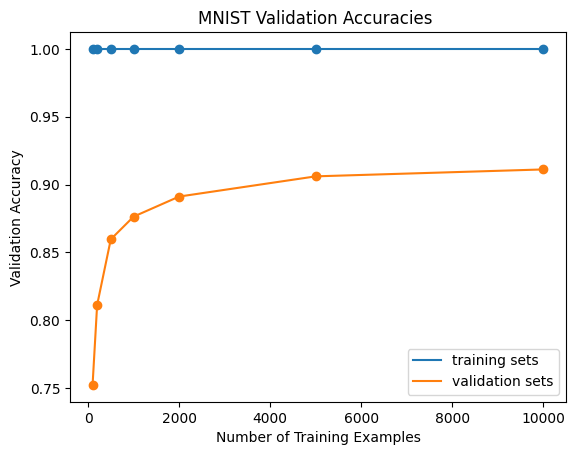

In [ ]:
# Question 4
from sklearn.svm import SVC

# Part a)
evaluations_training = []
evaluations_validation = []

def svm_train(size):
    print("Testing training size: " + str(size))
    # isolating number of training examples, reshaping (flatterning)
    train_subset_data = mnist_training_data[:size]
    train_subset_labels = mnist_training_labels[:size]
    reshaped_training_data = train_subset_data.reshape(size, -1)
    reshaped_validation_data = mnist_validation_data.reshape(len(mnist_validation_data), -1)

    # training SVM
    svm = SVC(kernel = 'linear')
    svm.fit(reshaped_training_data, train_subset_labels)

    # predict using validation and training data
    y_pred_validation = svm.predict(reshaped_validation_data)
    y_pred_training = svm.predict(reshaped_training_data)

    # result of evaluations
    print("Training accuracy: " + str(evaluation(train_subset_labels, y_pred_training)))
    print("Validation accuracy: " + str(evaluation(mnist_validation_labels, y_pred_validation)))
    evaluations_training.append(evaluation(train_subset_labels, y_pred_training))
    evaluations_validation.append(evaluation(mnist_validation_labels, y_pred_validation))

# train on different sizes
training_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
for size in training_sizes:
    svm_train(size)

# plot both graphs
plt.scatter(training_sizes, evaluations_training)
plt.scatter(training_sizes, evaluations_validation)
plt.plot(training_sizes, evaluations_training, label = "training sets")
plt.plot(training_sizes, evaluations_validation, label = "validation sets")
plt.title("MNIST Validation Accuracies ")
plt.xlabel('Number of Training Examples')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

Testing training size: 100
Training accuracy: 0.88
Validation accuracy: 0.7613908872901679
Testing training size: 200
Training accuracy: 0.855
Validation accuracy: 0.7937649880095923
Testing training size: 500
Training accuracy: 0.832
Validation accuracy: 0.8285371702637889
Testing training size: 1000
Training accuracy: 0.851
Validation accuracy: 0.8273381294964028
Testing training size: 2000
Training accuracy: 0.851
Validation accuracy: 0.8249400479616307
Testing training size: 3337
Training accuracy: 0.8513635001498352
Validation accuracy: 0.8285371702637889


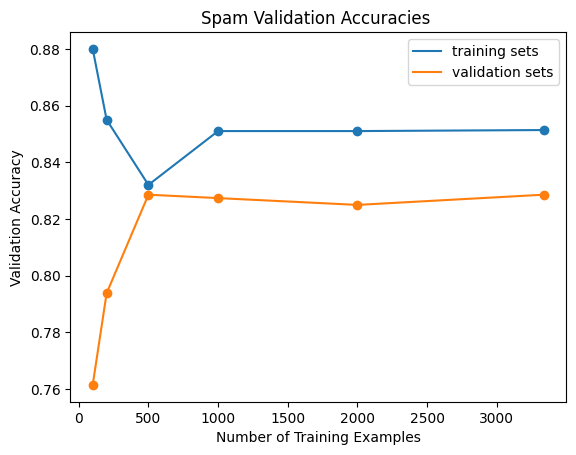

In [ ]:
# Part b)
evaluations_training = []
evaluations_validation = []

def svm_train(size):
    print("Testing training size: " + str(size))
    # taking subsets of training data, reshaping
    train_subset_data = spam_training_data[:size]
    train_subset_labels = spam_training_labels[:size]
    reshaped_training_data = train_subset_data.reshape(size, -1)
    reshaped_validation_data = spam_validation_data.reshape(len(spam_validation_data), -1)

    # train SVM
    svm = SVC(kernel = 'linear')
    svm.fit(reshaped_training_data, train_subset_labels)

    # predict using training and validation data
    y_pred_training = svm.predict(reshaped_training_data)
    y_pred_validation = svm.predict(reshaped_validation_data)

    # evaluation results
    print("Training accuracy: " + str(evaluation(train_subset_labels, y_pred_training)))
    print("Validation accuracy: " + str(evaluation(spam_validation_labels, y_pred_validation)))
    evaluations_training.append(evaluation(train_subset_labels, y_pred_training))
    evaluations_validation.append(evaluation(spam_validation_labels, y_pred_validation))

# train on different training sizes
training_sizes = [100, 200, 500, 1000, 2000, len(spam_training_data)]
for size in training_sizes:
    svm_train(size)

# display both graphs
plt.scatter(training_sizes, evaluations_training)
plt.scatter(training_sizes, evaluations_validation)
plt.plot(training_sizes, evaluations_training, label = "training sets")
plt.plot(training_sizes, evaluations_validation, label = "validation sets")
plt.title("Spam Validation Accuracies ")
plt.xlabel('Number of Training Examples')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Question 5
evaluations_training = []
evaluations_validation = []

def svm_train(c_param):
    # isolating number of training examples, reshaping (flatterning)
    train_subset_data = mnist_training_data[:10000]
    train_subset_labels = mnist_training_labels[:10000]
    reshaped_training_data = train_subset_data.reshape(10000, -1)
    reshaped_validation_data = mnist_validation_data.reshape(len(mnist_validation_data), -1)

    # training SVM
    print("Testing C value: " + str(c_param))
    svm = SVC(kernel = 'linear', C=c_param)
    svm.fit(reshaped_training_data, train_subset_labels)

    # predict using validation and training data
    y_pred_validation = svm.predict(reshaped_validation_data)
    y_pred_training = svm.predict(reshaped_training_data)

    # result of evaluations
    train_eval = evaluation(train_subset_labels, y_pred_training)
    validation_eval = evaluation(mnist_validation_labels, y_pred_validation)
    print("Training accuracy: " + str(train_eval))
    print("Validation accuracy: " + str(validation_eval))
    print()
    evaluations_training.append(train_eval)
    evaluations_validation.append(validation_eval)

# train on different C's
c = [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
for c_param in c:
    svm_train(c_param)

print(evaluations_training)
print(evaluations_validation)

Testing C value: 1e-08
Training accuracy: 0.8996
Validation accuracy: 0.8921
Testing C value: 1e-07
Training accuracy: 0.9367
Validation accuracy: 0.9255
Testing C value: 1e-06
Training accuracy: 0.9669
Validation accuracy: 0.9336
Testing C value: 1e-05
Training accuracy: 0.9931
Validation accuracy: 0.9183
Testing C value: 0.0001
Training accuracy: 1.0
Validation accuracy: 0.9112
Testing C value: 0.001
Training accuracy: 1.0
Validation accuracy: 0.9112
Testing C value: 0.01
Training accuracy: 1.0
Validation accuracy: 0.9112
Testing C value: 0.1
Training accuracy: 1.0
Validation accuracy: 0.9112
[0.8996, 0.9367, 0.9669, 0.9931, 1.0, 1.0, 1.0, 1.0]
[0.8921, 0.9255, 0.9336, 0.9183, 0.9112, 0.9112, 0.9112, 0.9112]


In [ ]:
test_c = 0
best_accuracy = 0

for i, accuracy in enumerate(evaluations_validation):
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_c = c[i]
print("The best C value is: " + str(best_c) + " with accuracy " + str(best_accuracy))

The best C value is: 1e-06 with accuracy 0.9336


In [ ]:
# Question 6
evaluations_training = []
evaluations_validation = []

def svm_train(c_param, train_data, train_labels, validation_data, validation_labels):
    # train SVM
    svm = SVC(kernel = 'linear', C = c_param)
    svm.fit(train_data, train_labels)

    # predict using training and validation data
    y_pred_training = svm.predict(train_data)
    y_pred_validation = svm.predict(validation_data)

    # evaluation results
    evaluations_training.append(evaluation(train_labels, y_pred_training))
    evaluations_validation.append(evaluation(validation_labels, y_pred_validation))

spam_indices = np.arange(spam_data.shape[0])
np.random.shuffle(spam_indices)
spam_shuffled_data = spam_data[spam_indices]
spam_shuffled_labels = spam_labels[spam_indices]
partition_size = spam_data.shape[0]//5

partition1_data = spam_shuffled_data[:partition_size]
partition1_labels = spam_shuffled_labels[:partition_size]

partition2_data = spam_shuffled_data[partition_size:2*partition_size]
partition2_labels = spam_shuffled_labels[partition_size:2*partition_size]

partition3_data = spam_shuffled_data[2*partition_size:3*partition_size]
partition3_labels = spam_shuffled_labels[2*partition_size:3*partition_size]

partition4_data = spam_shuffled_data[3*partition_size:4*partition_size]
partition4_labels = spam_shuffled_labels[3*partition_size:4*partition_size]

partition5_data = spam_shuffled_data[4*partition_size:5*partition_size]
partition5_labels = spam_shuffled_labels[4*partition_size:5*partition_size]

partitions_data = [partition1_data, partition2_data, partition3_data, partition4_data, partition5_data]
partitions_labels = [partition1_labels, partition2_labels, partition3_labels, partition4_labels, partition5_labels]

c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 400]
validation_data = []
validation_labels = []
for c_param in c:
  print("Testing C: " + str(c_param))
  for i in range(5):
    training_data = []
    training_labels = []
    validation_data = partitions_data[i]
    validation_labels = partitions_labels[i]
    for j in range(5):
      if i != j:
        training_data.extend(partitions_data[j])
        training_labels.extend(partitions_labels[j])
    svm_train(c_param, training_data, training_labels, validation_data, validation_labels)

  avg_validation_accuracy = np.mean(evaluations_validation)
  print("cross-validation accuracy over k = 5 is: " + str(avg_validation_accuracy))

Testing C: 1e-05
cross-validation accuracy over k = 5 is: 0.712230215827338
Testing C: 0.0001
cross-validation accuracy over k = 5 is: 0.7159472422062351
Testing C: 0.001
cross-validation accuracy over k = 5 is: 0.7316546762589928
Testing C: 0.01
cross-validation accuracy over k = 5 is: 0.7510191846522781
Testing C: 0.1
cross-validation accuracy over k = 5 is: 0.7668585131894484
Testing C: 1
cross-validation accuracy over k = 5 is: 0.7790967226219023
Testing C: 10
cross-validation accuracy over k = 5 is: 0.7889003083247688
Testing C: 100
cross-validation accuracy over k = 5 is: 0.7959532374100718
Testing C: 400
cross-validation accuracy over k = 5 is: 0.8013855582200905


In [ ]:
test_c = 0
best_accuracy = 0

for i, accuracy in enumerate(evaluations_validation):
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_c = c[i]
print("The best C value is: " + str(best_c) + " with accuracy " + str(best_accuracy))

In [ ]:
# Question 7: MNIST

from skimage.feature import hog
import cv2
import pandas as pd

def hog_compute(data):
  hog_features_list = []
  pix_per_cell = 8
  cell_per_block = 2
  orient = 9

  for img in data:
      hog_features = hog(img.squeeze(), orientations=orient,
                        pixels_per_cell=(pix_per_cell, pix_per_cell),
                        cells_per_block=(cell_per_block, cell_per_block))
      hog_features_list.append(hog_features)

  return np.array(hog_features_list)

hog_training_data = hog_compute(mnist_training_data)
svm = SVC(kernel = 'linear')
svm.fit(hog_training_data, mnist_training_labels)

hog_validation_features = hog_compute(mnist_validation_data)
y_pred_training = svm.predict(hog_training_data)
y_pred_validation = svm.predict(hog_validation_features)

print("MNIST training accuracy w/ HOG features: " + str(evaluation(mnist_validation_labels, y_pred_validation)))
print("MNIST training accuracy w/ HOG features: " + str(evaluation(mnist_training_labels, y_pred_training)))

0.9544


In [ ]:
mnist_test_data = mnist['test_data']
hog_test_data = hog_compute(mnist_test_data)
y_pred = svm.predict(hog_test_data)

def results_to_csv(y_test, file_name):
  y_test = y_test.astype(int)
  df = pd.DataFrame({'Category': y_test})
  df.index += 1
  df.to_csv(file_name, index_label='Id')
  print('saved')

results_to_csv(y_pred, "mnist_kaggle.csv")


saved


In [66]:
# Question 7: Spam
# Part b)
reshaped_training_data = spam_training_data.reshape(len(spam_training_data), -1)
reshaped_validation_data = spam_validation_data.reshape(len(spam_validation_data), -1)

# train SVM
svm = SVC(kernel = 'linear')
svm.fit(reshaped_training_data, spam_training_labels)

# predict using training and validation data
y_pred_training = svm.predict(reshaped_training_data)
y_pred_validation = svm.predict(reshaped_validation_data)

# evaluation results
spam_test_data = spam['test_data']
y_pred = svm.predict(spam_test_data)
print("Spam training accuracy w/ adjusted featurize.py: " + str(evaluation(spam_training_labels, y_pred_training)))
print("Spam validation accuracy w/ adjusted featurize.py: " + str(evaluation(spam_validation_labels, y_pred_validation)))


Spam training accuracy w/ adjusted featurize.py: 0.8513635001498352
Spam validation accuracy w/ adjusted featurize.py: 0.841726618705036


In [65]:
import pandas as pd
spam_test_data = spam['test_data']
y_pred = svm.predict(spam_test_data)

def results_to_csv(y_test, file_name):
  y_test = y_test.astype(int)
  df = pd.DataFrame({'Category': y_test})
  df.index += 1
  df.to_csv(file_name, index_label='Id')
  print('saved')

results_to_csv(y_pred, "spam_kaggle.csv")


saved
